<a href="https://colab.research.google.com/github/elizarraras1/InclusionFinanciera/blob/main/Anexos_Financial_Inclusion_EBEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis estadístico

##Determinantes de la ENIF

El archivo contiene 84 columnas y 38,152 registros. Todas las variables son de tipo entero (int64), e implica que representan categorías codificadas numéricamente.

A continuación se muestra el programa utilizado para el análisis estadístico básico para cada columna categórica y se incluye:

* Frecuencia de cada categoría.
* Proporción relativa de cada categoría.
* Detección de valores faltantes (por ejemplo, -1).

### Código en Python

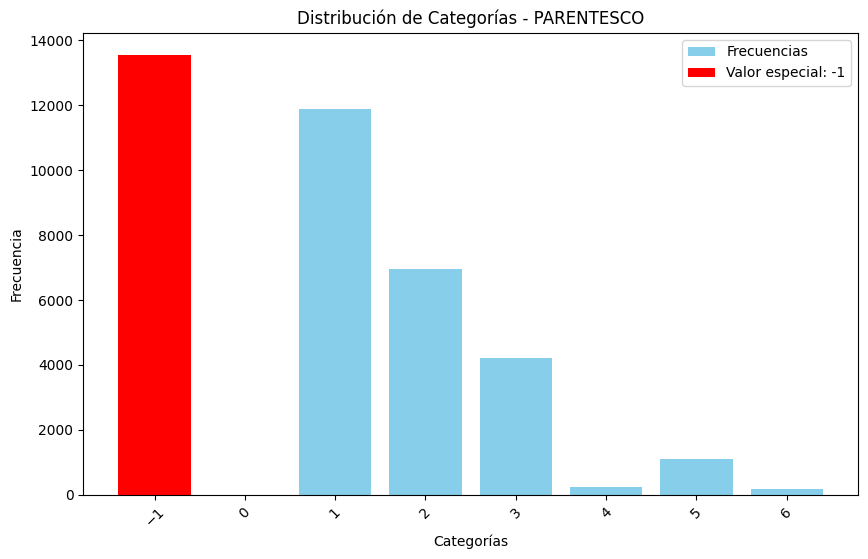

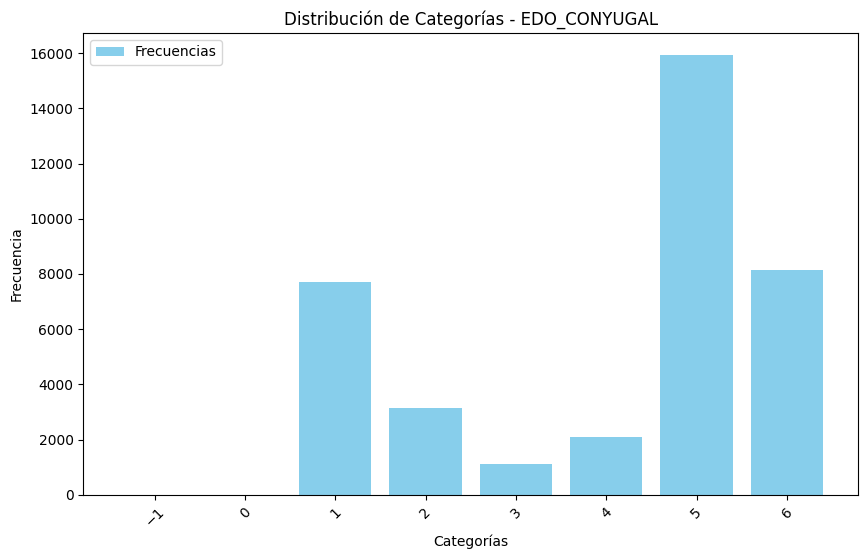

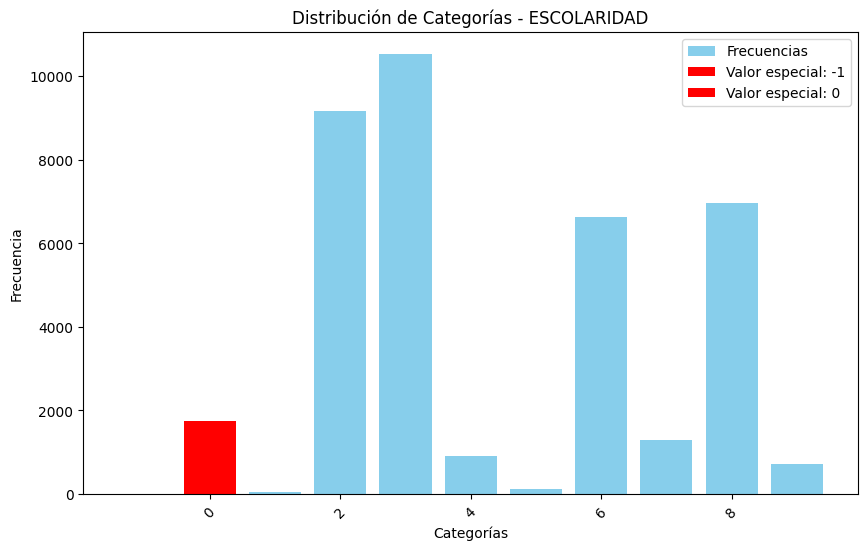

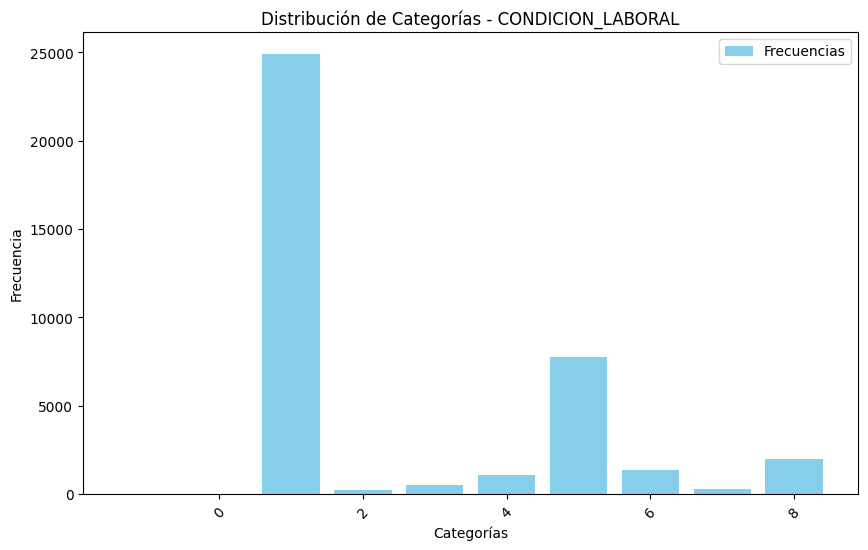

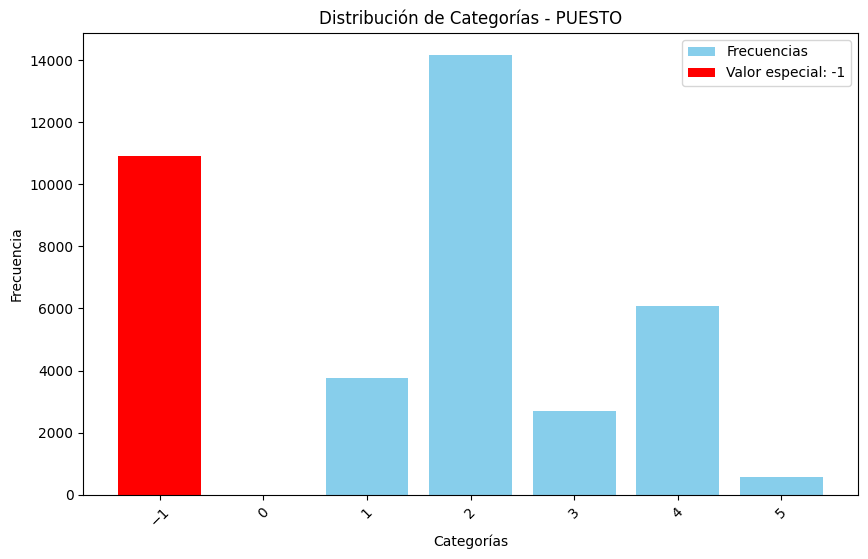

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_data(df, special_values=None):

    if special_values is None:
        special_values = []

    analysis = {}
    for column in df.columns:
        value_counts = df[column].value_counts()
        proportions = df[column].value_counts(normalize=True)
        special_counts = {val: value_counts.get(val, 0) for val in special_values}

        analysis[column] = {
            "frequencies": value_counts.to_dict(),
            "proportions": proportions.to_dict(),
            "unique_values": value_counts.index.tolist(),
            "special_values": special_counts
        }

    return analysis

def plot_categorical_data(analysis, column_name, special_values=None, save_path=None):

    if special_values is None:
        special_values = []

    data = analysis[column_name]
    frequencies = data['frequencies']
    special_values_in_column = {key: frequencies.get(key, 0) for key in special_values}

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(frequencies.keys(), frequencies.values(), color='skyblue', label='Frecuencias')

    # Resaltar valores especiales
    if special_values_in_column:
        for value, freq in special_values_in_column.items():
            plt.bar(value, freq, color='red', label=f'Valor especial: {value}' if freq > 0 else None)

    plt.title(f"Distribución de Categorías - {column_name}")
    plt.xlabel("Categorías")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.legend()

    # Guardar o mostrar el gráfico
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

# Cargar el archivo CSV
file_path = "BASE_IF_SIN_VAR_PARA_IF.csv"
data = pd.read_csv(file_path)

# Valores especiales a resaltar
special_values = [-1, 0]

# Realizar el análisis
categorical_analysis = analyze_categorical_data(data, special_values)

# Generar gráficos para las primeras 5 columnas como ejemplo, se puede cambiar para mostrar más variables
# o para mostrar alguna en específico
for column in list(data.columns[:5]):
    plot_categorical_data(categorical_analysis, column, special_values)

NOTAS.

Los resultados completos para todas las columnas se guardan en el archivo categorical_analysis_results.txt, el cual puede indagar para obtener el análisis completo.

El programa genera gráficos para las primeras 5 columnas del archivo como ejemplo, éste se puede ajustar modificando `list(data.columns[:5])`

##Variables utilizadas para la construcción de la Inclusión Financiera

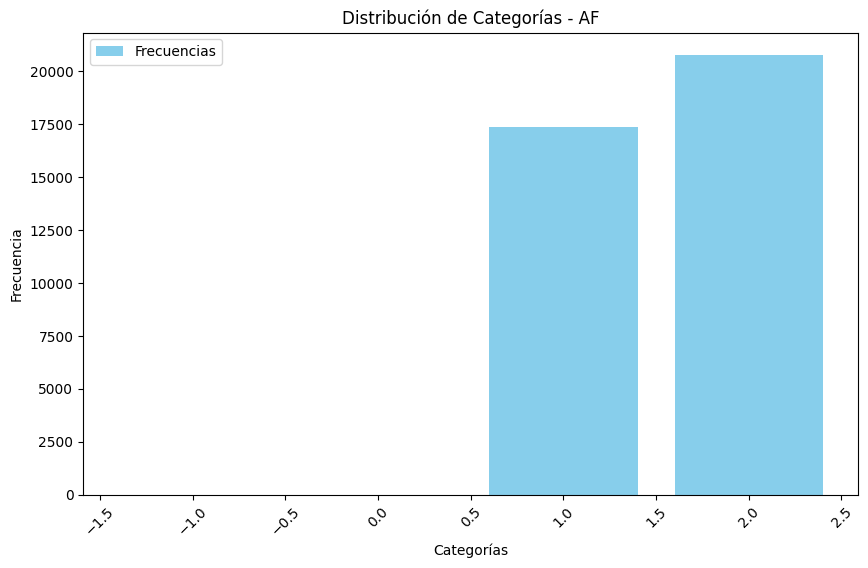

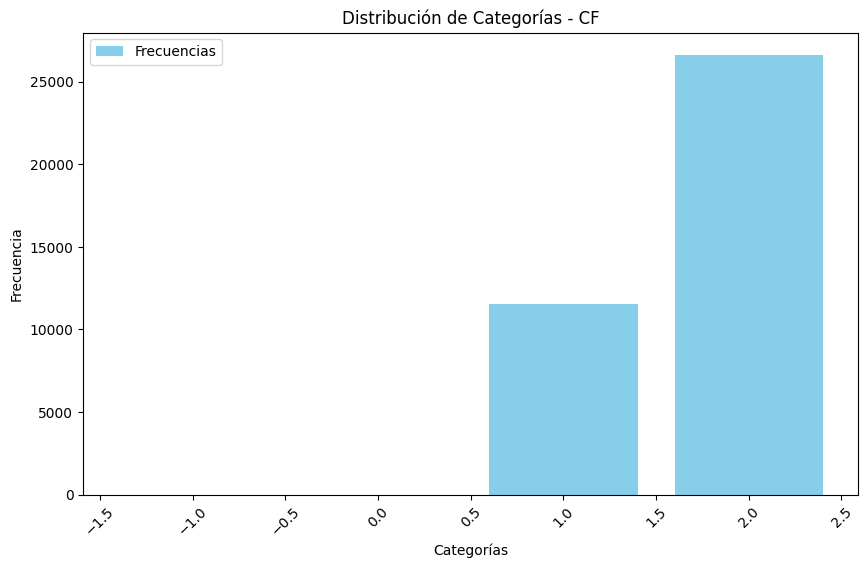

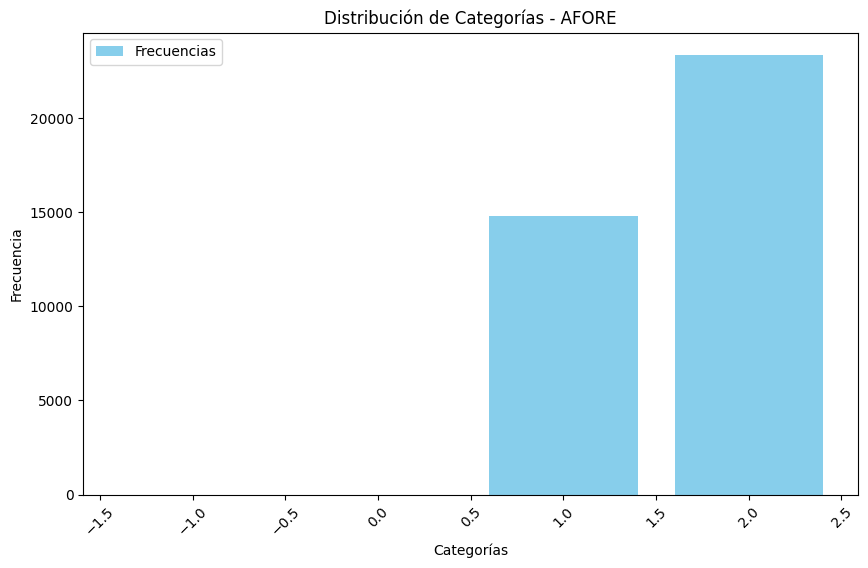

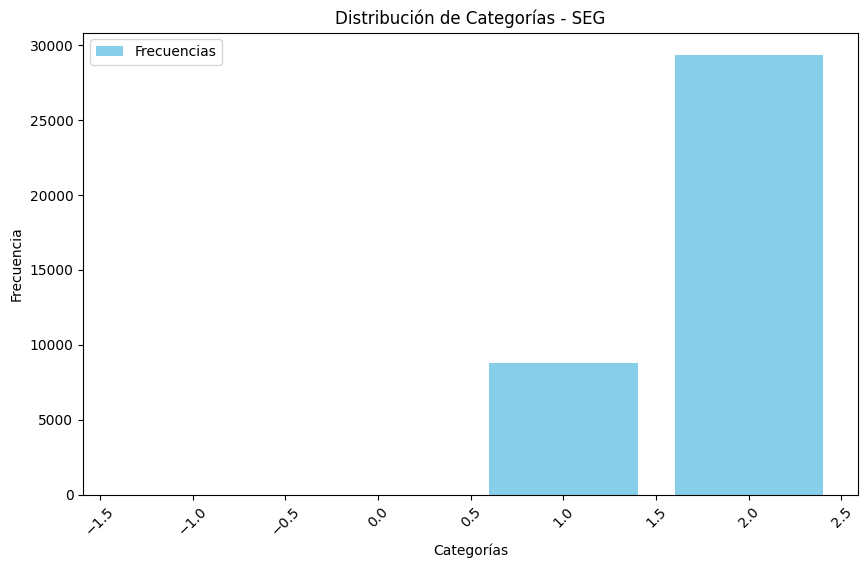

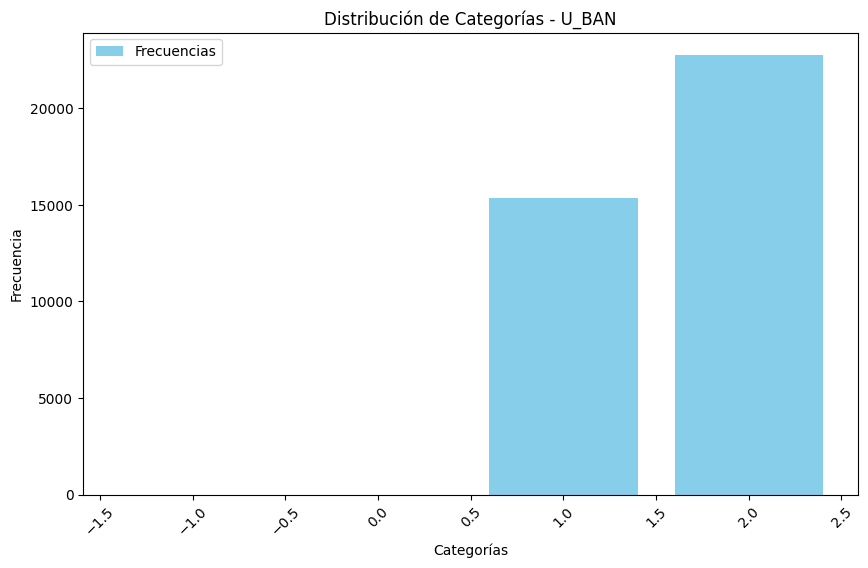

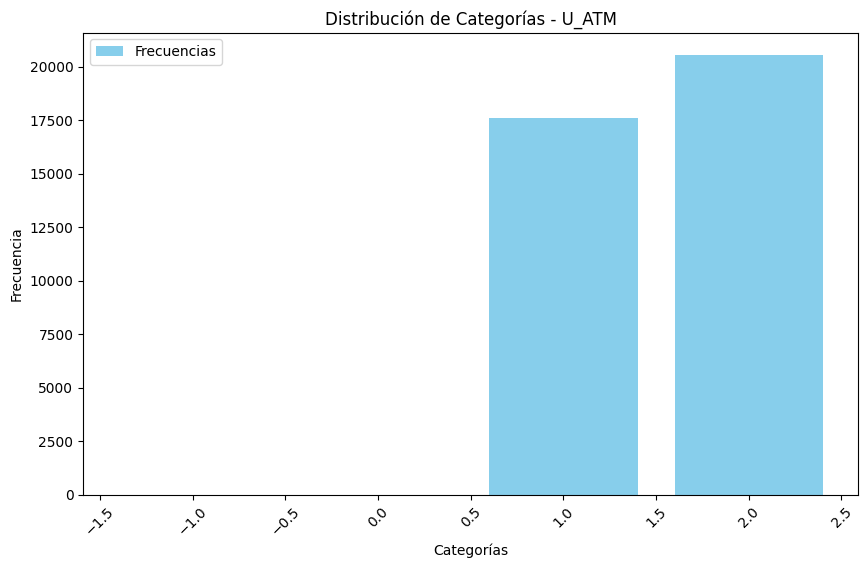

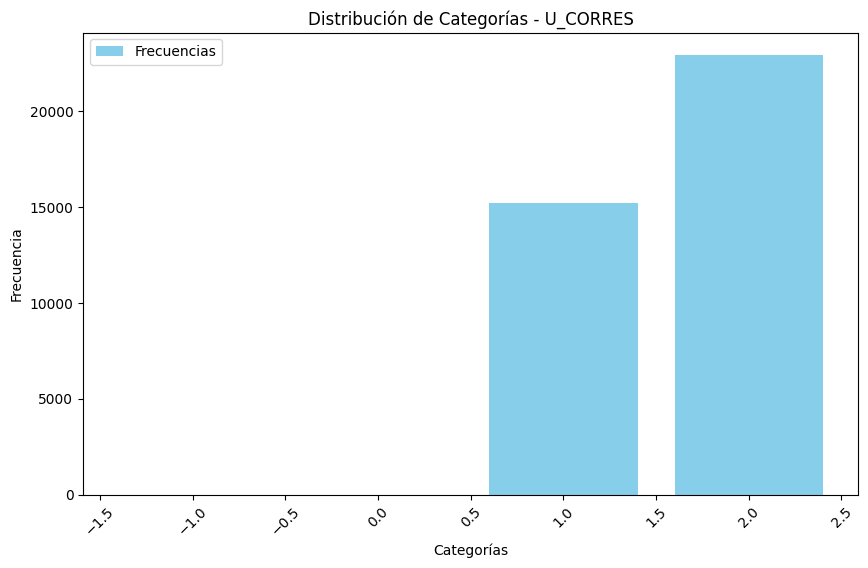

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_data(df, special_values=None):

    if special_values is None:
        special_values = []

    analysis = {}
    for column in df.columns:
        value_counts = df[column].value_counts()
        proportions = df[column].value_counts(normalize=True)
        special_counts = {val: value_counts.get(val, 0) for val in special_values}

        analysis[column] = {
            "frequencies": value_counts.to_dict(),
            "proportions": proportions.to_dict(),
            "unique_values": value_counts.index.tolist(),
            "special_values": special_counts
        }

    return analysis

def plot_categorical_data(analysis, column_name, special_values=None, save_path=None):

    if special_values is None:
        special_values = []

    data = analysis[column_name]
    frequencies = data['frequencies']
    special_values_in_column = {key: frequencies.get(key, 0) for key in special_values}

    plt.figure(figsize=(10, 6))
    plt.bar(frequencies.keys(), frequencies.values(), color='skyblue', label='Frecuencias')

    if special_values_in_column:
        for value, freq in special_values_in_column.items():
            plt.bar(value, freq, color='red', label=f'Valor especial: {value}' if freq > 0 else None)

    plt.title(f"Distribución de Categorías - {column_name}")
    plt.xlabel("Categorías")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.legend()

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

file_path = "IF.csv"
data = pd.read_csv(file_path)
data.replace( [9], 2, inplace = True)
data.replace( [0], 2, inplace = True)

special_values = [-1]

categorical_analysis = analyze_categorical_data(data, special_values)


for column in list(data.columns[:7]):
    plot_categorical_data(categorical_analysis, column, special_values)

#Matriz de correlación

Matriz de correlación guardada en cramers_v_matrix.csv
Mapa de calor guardado en cramers_v_heatmap.png


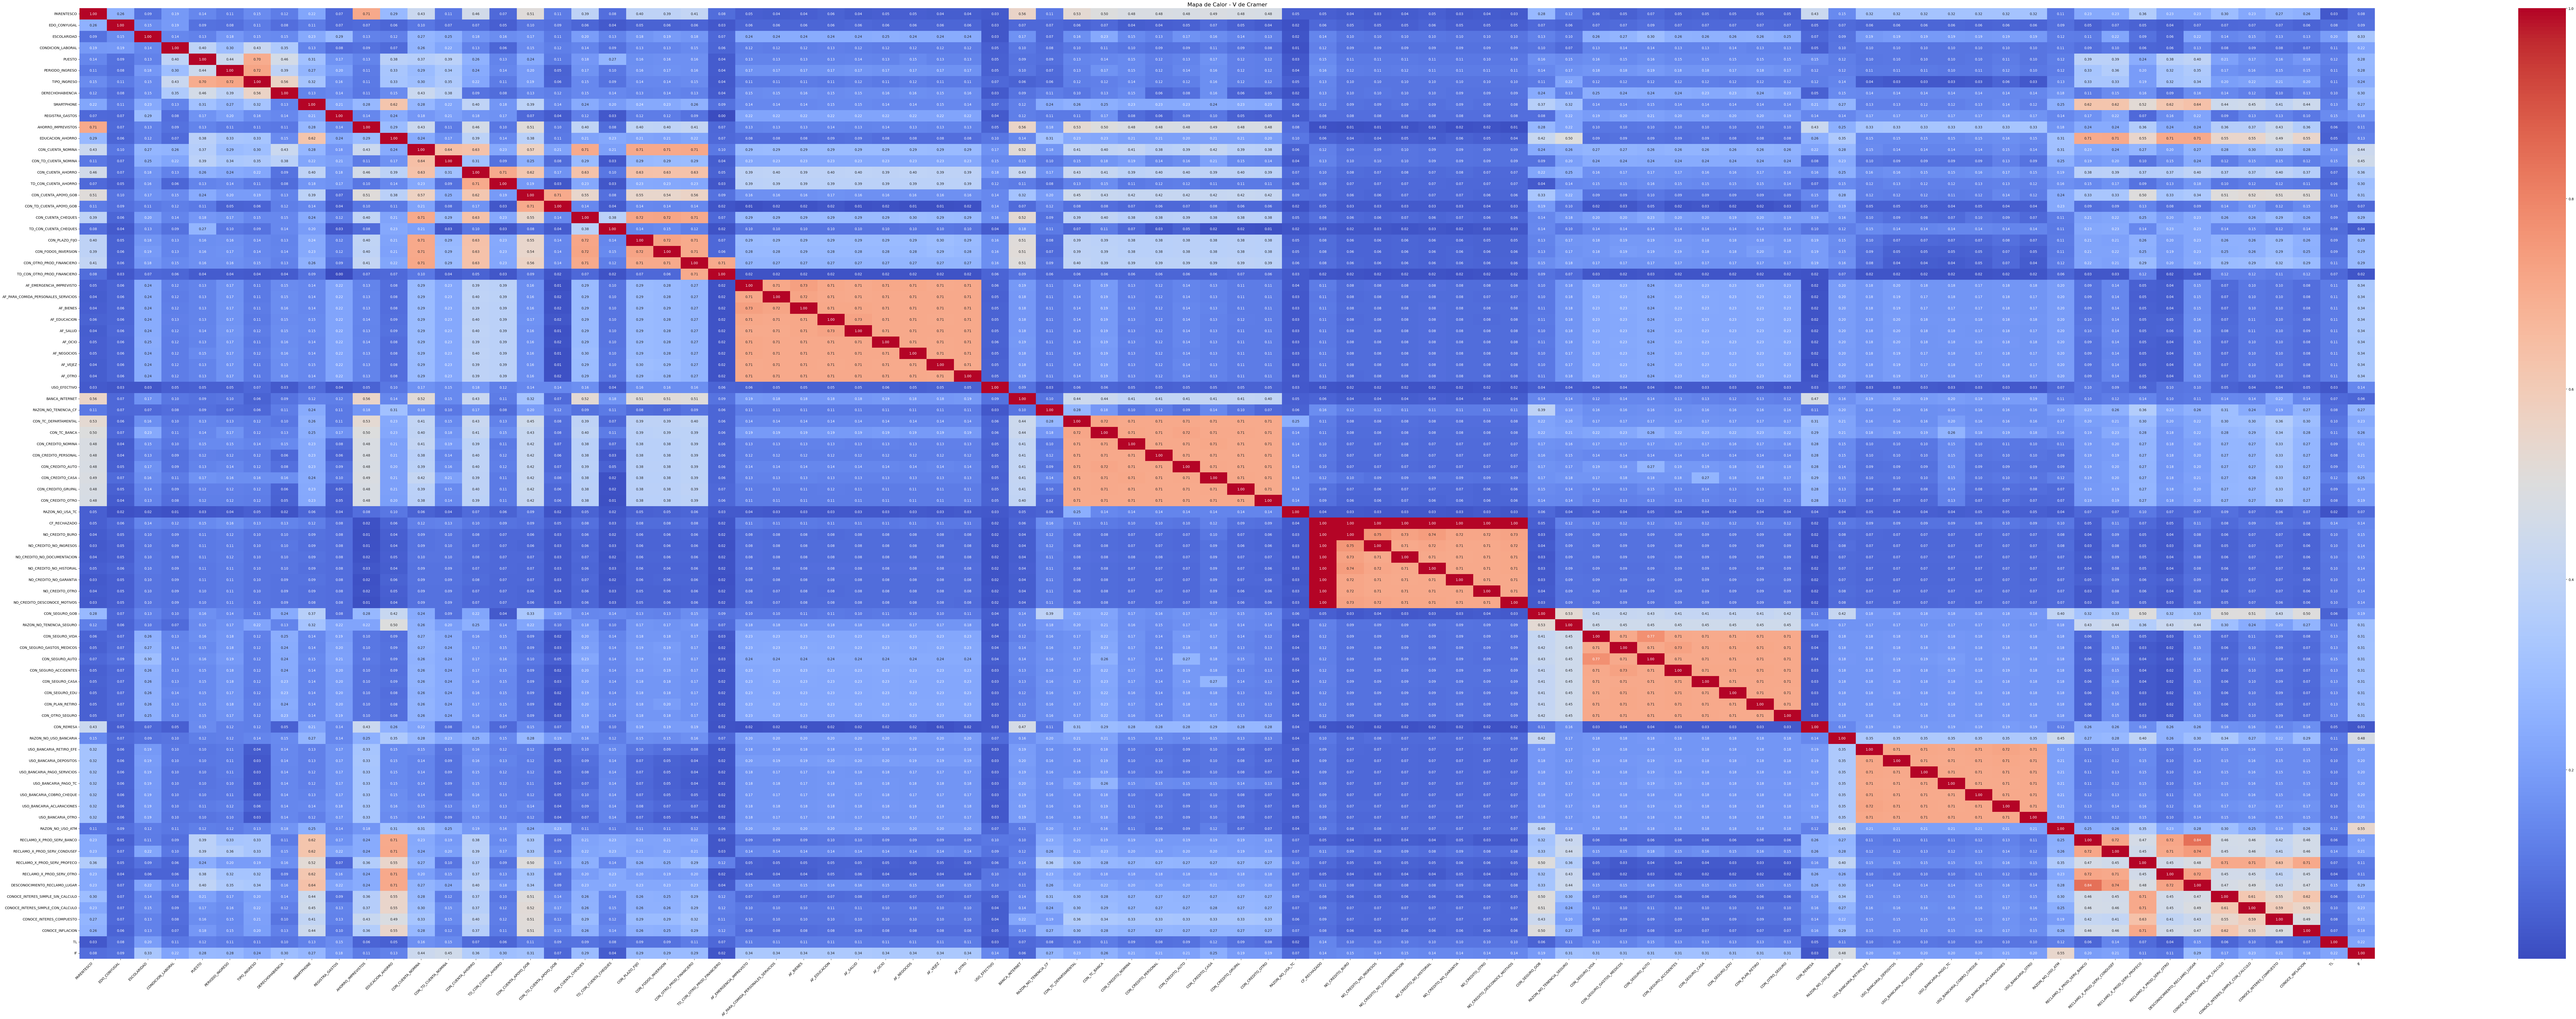

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(contingency_table):

    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def compute_cramers_v_matrix(df):

    columns = df.columns
    n = len(columns)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)

    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i <= j:
                contingency_table = pd.crosstab(df[col1], df[col2])
                cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
                cramers_v_matrix.loc[col2, col1] = cramers_v_matrix.loc[col1, col2]

    return cramers_v_matrix

def plot_cramers_v_heatmap(matrix, save_path=None):

    plt.figure(figsize=(150, 50))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Mapa de Calor - V de Cramer", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Guardar o mostrar el gráfico
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

# Cargar el archivo CSV
file_path = "BASE_IF_SIN_VAR_PARA_IF.csv"
data = pd.read_csv(file_path)

# Calcular la matriz de V de Cramer
cramers_v_matrix = compute_cramers_v_matrix(data)

# Guardar la matriz en un archivo CSV
matrix_output_path = "cramers_v_matrix.csv"
cramers_v_matrix.to_csv(matrix_output_path)

# Visualizar el mapa de calor
heatmap_output_path = "cramers_v_heatmap.png"
plot_cramers_v_heatmap(cramers_v_matrix, save_path=heatmap_output_path)

print(f"Matriz de correlación guardada en {matrix_output_path}")
print(f"Mapa de calor guardado en {heatmap_output_path}")

#Árbol de decisión

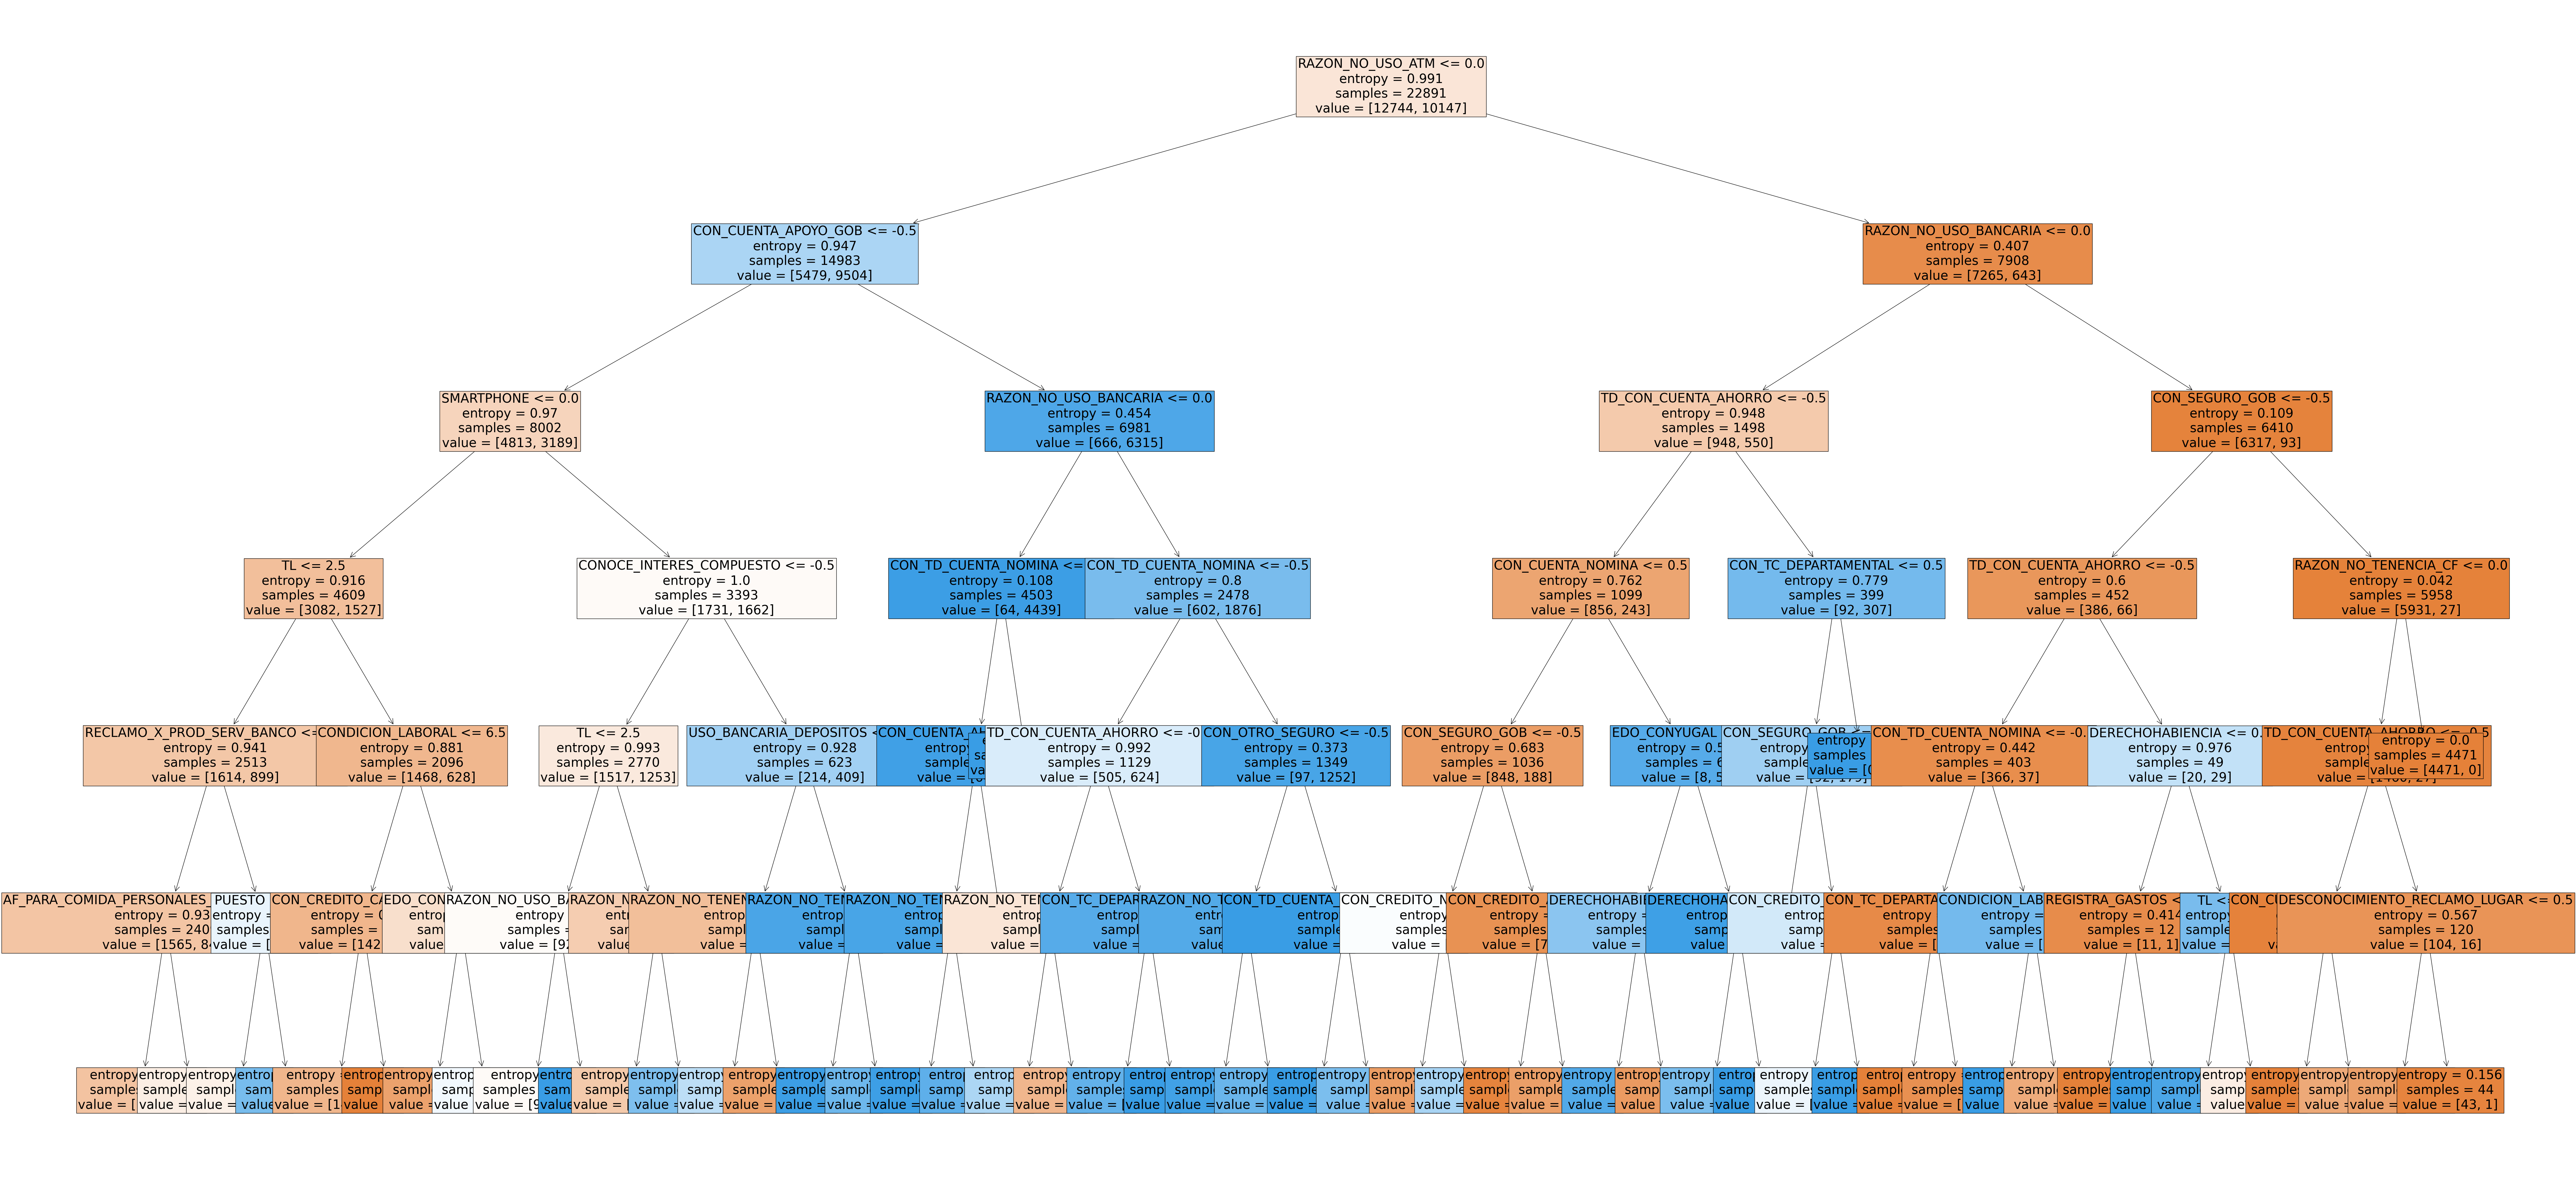